In [1]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import matplotlib.pyplot as plt
from PIL import Image


In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

transformer=transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
    transforms.Normalize([0.5,0.5,0.5], # 0-1 to [-1,1] , formula (x-mean)/std
                        [0.5,0.5,0.5])
])

cuda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


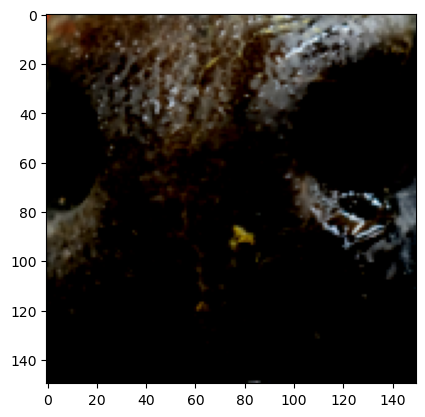

In [3]:
train_path='C:/Users/dell/Desktop/computervision/basedata/train'
test_path='C:/Users/dell/Desktop/computervision/basedata/validation'

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transformer),
    batch_size=64, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transformer),
    batch_size=32, shuffle=True
)


img_path = 'C:/Users/dell/Desktop/computervision/cattle_0200_DSCF3871.jpg'
image = Image.open(img_path)
transformed_image = transformer(image)
transformed_image = transformed_image.numpy().transpose(1, 2, 0)
plt.imshow(transformed_image)
plt.show()


In [4]:
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])
print(classes)

['cattle_0100', 'cattle_0200', 'cattle_0300', 'cattle_0400', 'cattle_0500', 'cattle_0600', 'cattle_0700', 'cattle_0800', 'cattle_0900', 'cattle_1000', 'cattle_1100', 'cattle_1200', 'cattle_1300', 'cattle_1400', 'cattle_1500', 'cattle_1600', 'cattle_1700', 'cattle_1800', 'cattle_1900', 'cattle_2000', 'cattle_2100', 'cattle_2200', 'cattle_2220', 'cattle_2300', 'cattle_2320', 'cattle_2400', 'cattle_2500', 'cattle_2510', 'cattle_2600', 'cattle_2700', 'cattle_2710', 'cattle_2740', 'cattle_2800', 'cattle_2900', 'cattle_2930', 'cattle_3000', 'cattle_3100', 'cattle_3200', 'cattle_3300', 'cattle_3400', 'cattle_3420', 'cattle_3802', 'cattle_3812', 'cattle_3814', 'cattle_3819', 'cattle_3832', 'cattle_3842', 'cattle_3844', 'cattle_3847', 'cattle_3852']


In [5]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=6):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=32)
        self.relu2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=64)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(num_features=64)
        self.relu4 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.conv5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(num_features=128)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(num_features=128)
        self.relu6 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(in_features=6 * 6 * 128, out_features=num_classes)

    def forward(self, input):
        output = self.conv1(input)
        output = self.bn1(output)
        output = self.relu1(output)
        output = self.conv2(output)
        output = self.bn2(output)
        output = self.relu2(output)
        output = self.pool1(output)
        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)
        output = self.conv4(output)
        output = self.bn4(output)
        output = self.relu4(output)
        output = self.pool2(output)
        output = self.conv5(output)
        output = self.bn5(output)
        output = self.relu5(output)
        output = self.conv6(output)
        output = self.bn6(output)
        output = self.relu6(output)
        output = self.pool3(output)
        output = output.view(-1, 128 * 6 * 6)
        output = self.fc(output)
        return output


In [6]:
model=ConvNet(num_classes=50).to(device)
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()
num_epochs=20
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))
print(train_count,test_count)
best_accuracy=0.0

581 146


Epoch: 0 Train Loss: tensor(44.3027) Train Accuracy: 0.27538726333907054 Test Accuracy: 0.02054794520547945
Epoch: 1 Train Loss: tensor(10.6647) Train Accuracy: 0.6712564543889845 Test Accuracy: 0.10273972602739725
Epoch: 2 Train Loss: tensor(2.6881) Train Accuracy: 0.8846815834767642 Test Accuracy: 0.2054794520547945
Epoch: 3 Train Loss: tensor(1.3838) Train Accuracy: 0.9380378657487092 Test Accuracy: 0.4452054794520548
Epoch: 4 Train Loss: tensor(0.4537) Train Accuracy: 0.9621342512908778 Test Accuracy: 0.5616438356164384
Epoch: 5 Train Loss: tensor(0.6644) Train Accuracy: 0.9759036144578314 Test Accuracy: 0.5821917808219178
Epoch: 6 Train Loss: tensor(0.6631) Train Accuracy: 0.9621342512908778 Test Accuracy: 0.7191780821917808
Epoch: 7 Train Loss: tensor(0.5443) Train Accuracy: 0.963855421686747 Test Accuracy: 0.8082191780821918
Epoch: 8 Train Loss: tensor(0.4516) Train Accuracy: 0.9862306368330465 Test Accuracy: 0.863013698630137
Epoch: 9 Train Loss: tensor(0.2883) Train Accuracy: 

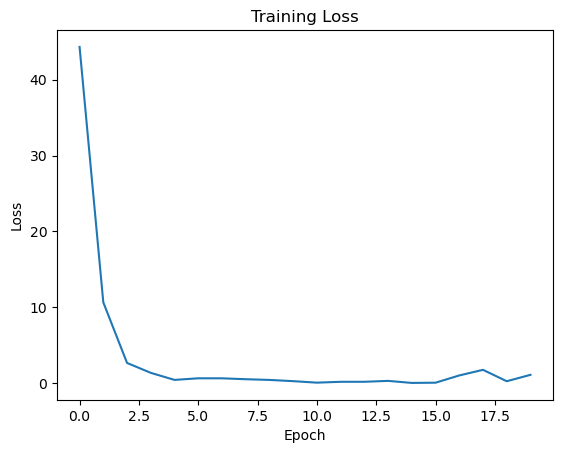

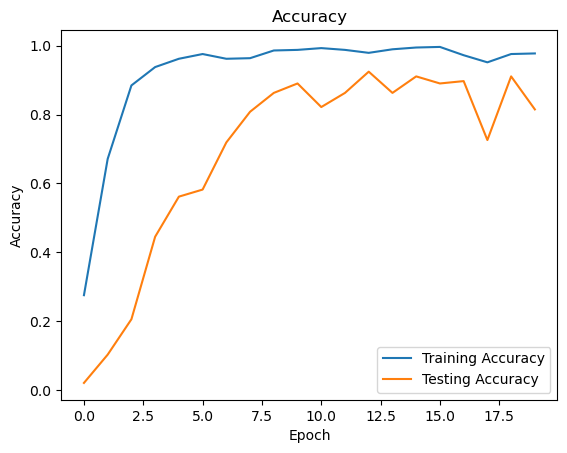

In [7]:
import matplotlib.pyplot as plt

train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    train_accuracy=0.0
    train_loss=0.0
    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        optimizer.zero_grad()
        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()
        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)
        train_accuracy+=int(torch.sum(prediction==labels.data))
    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count
    model.eval()
    
    test_accuracy=0.0
    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())
        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))
    test_accuracy=test_accuracy/test_count
    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))
    
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy
        
# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training and testing accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Testing Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
